In [24]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Loading the data
data = pd.read_csv('../../Lab1/Heenal/Data/Credit_Card_Applications.csv', sep=",")

In [33]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [34]:
# separating the data and the target variable
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [35]:
X.shape

(690, 15)

In [36]:
data.shape

(690, 16)

In [37]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
X = sc.fit_transform(X)

In [38]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [39]:
from minisom import MiniSom

In [40]:
# Creating the SOM object
som = MiniSom(x = 10, y = 10, input_len= 14, sigma = 1.0, learning_rate=0.5)

In [41]:
# training the SOM
som.random_weights_init(X)
som.train_random(data= X, num_iteration = 100)

ValueError: Received 15 features, expected 14.

In [16]:
# to vsualize the results
from pylab import bone, pcolor, colorbar, plot, show

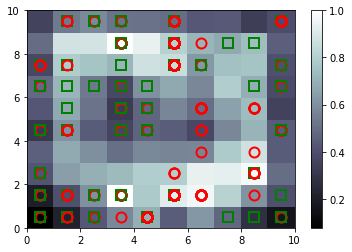

In [17]:
# Initializing window
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[Y[i]], 
         markeredgecolor = colors[Y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2)
show()

**Red circles represent list of customers that didn't get approval, and green circles represent those who got approval.**

In [18]:
#Finding the frauds
mappings = som.win_map(X)

In [19]:
mappings

defaultdict(list,
            {(5,
              7): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
                     0.375     , 0.05561404, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      , 0.01212   ]), array([1.        , 0.67413534, 0.09678571, 0.5       , 0.53846154,
                     0.375     , 0.08473684, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.16      , 0.        ]), array([1.        , 0.2793985 , 0.125     , 0.5       , 0.23076923,
                     0.375     , 0.01754386, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.116     , 0.        ]), array([1.        , 0.44240602, 0.17857143, 0.5       , 0.15384615,
                     0.5       , 0.07894737, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.0705    , 0.        ]), array([1.        , 0.17789474, 0.01196429, 0.5       , 0.23076923,
   

In [21]:
frauds = np.concatenate((mappings[(1,2)], mappings[(4,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)
frauds

ValueError: all the input arrays must have same number of dimensions

In [ ]:
frauds = pd.DataFrame(frauds)
frauds